In [1]:
%matplotlib inline
from lexer import LangLexer
from parser import LangParser
from comb_parser import WhileCheckCorr
import datetime
import matplotlib.pyplot as plt
import seaborn as sn

Parser debugging for LangParser written to parser.out


In [2]:
lex = LangLexer()
parser_gen = LangParser()
parser_comb = WhileCheckCorr()

In [3]:
element = 'a+=1; '

In [4]:
prog = 'let i=1; let a=0; while i<=2 { ' + element * 16384 + '}'

In [5]:
%%time

gen_times = []
comb_times = []

for i in range(200):

    t1 = datetime.datetime.now()
    tree = parser_gen.parse(lex.tokenize(prog))
    t2 = datetime.datetime.now()
    res = parser_comb.parse_obj(prog)
    t3 = datetime.datetime.now()
    gen_times.append((t2 - t1).microseconds + (t2 - t1).seconds * 1000000)
    comb_times.append((t3 - t2).microseconds + (t3 - t2).seconds * 1000000)

CPU times: user 8min 50s, sys: 96.8 ms, total: 8min 50s
Wall time: 8min 50s


In [15]:
len(gen_times)

200

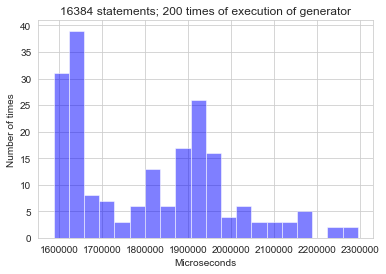

In [21]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sn.set_style('whitegrid')

num_bins = 20
n, bins, patches = plt.hist(gen_times, num_bins, facecolor='blue', alpha=0.5)

plt.title("16384 statements; 200 times of execution of generator")
plt.xlabel('Microseconds')
plt.ylabel('Number of times')

plt.savefig("16384 statements; 200 times of execution of generator.png")
plt.show()

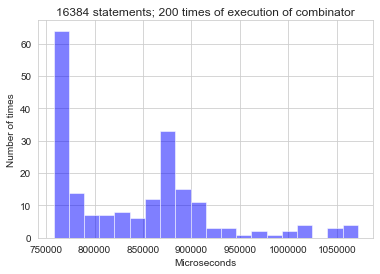

In [22]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sn.set_style('whitegrid')

num_bins = 20
n, bins, patches = plt.hist(comb_times, num_bins, facecolor='blue', alpha=0.5)

plt.title("16384 statements; 200 times of execution of combinator")
plt.xlabel('Microseconds')
plt.ylabel('Number of times')

plt.savefig("16384 statements; 200 times of execution of combinator.png")
plt.show()

In [8]:
prog1 = 'let i=1; let a=0; while i<=2 { ' + element * 32768 + '}'

In [9]:
%%time

gen_times1 = []
comb_times1 = []

for i in range(100):

    t1 = datetime.datetime.now()
    tree = parser_gen.parse(lex.tokenize(prog1))
    t2 = datetime.datetime.now()
    res = parser_comb.parse_obj(prog1)
    t3 = datetime.datetime.now()
    gen_times1.append((t2 - t1).microseconds + (t2 - t1).seconds * 1000000)
    comb_times1.append((t3 - t2).microseconds + (t3 - t2).seconds * 1000000)

CPU times: user 13min 46s, sys: 344 ms, total: 13min 46s
Wall time: 13min 47s


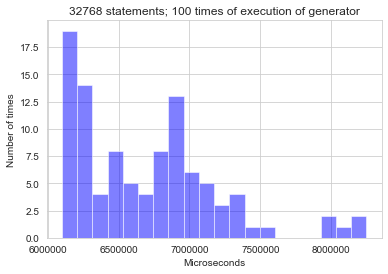

In [23]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sn.set_style('whitegrid')

num_bins = 20
n, bins, patches = plt.hist(gen_times1, num_bins, facecolor='blue', alpha=0.5)


plt.title("32768 statements; 100 times of execution of generator")
plt.xlabel('Microseconds')
plt.ylabel('Number of times')

plt.savefig("32768 statements; 100 times of execution of generator.png")
plt.show()

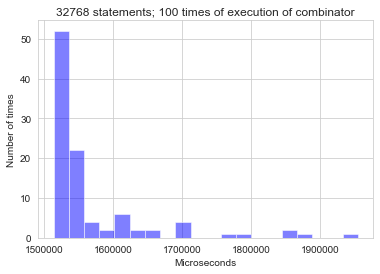

In [24]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sn.set_style('whitegrid')

num_bins = 20
n, bins, patches = plt.hist(comb_times1, num_bins, facecolor='blue', alpha=0.5)


plt.title("32768 statements; 100 times of execution of combinator")
plt.xlabel('Microseconds')
plt.ylabel('Number of times')

plt.savefig("32768 statements; 100 times of execution of combinator.png")
plt.show()